In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from IPython.display import display

## Data Exploratory

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
Gender    10000 non-null object
Height    10000 non-null float64
Weight    10000 non-null float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


None

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


Male      5000
Female    5000
Name: Gender, dtype: int64

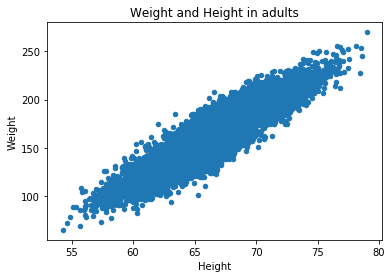

In [2]:
df = pd.read_csv('weight-height.csv')

display(df.info())
display(df.head())
display(df.describe())

display(df['Gender'].value_counts())

df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')

## Train Test Split

In [3]:
X = df[['Height']].values
y = df['Weight'].values

display(X.shape)
display(y.shape)

(10000, 1)

(10000,)

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2)

## Model

In [5]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD

model = Sequential()

model.add(Dense(1, input_shape=(1,)))

model.compile(Adam(lr=0.8), 'mean_squared_error')

model.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [6]:
# Train
history = model.fit(
    X_train, y_train,
    epochs=40, verbose=0)

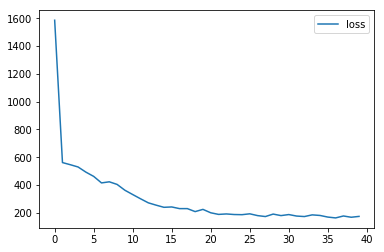

In [7]:
historydf = pd.DataFrame(history.history, index=history.epoch)
historydf.plot();

### Evaluate model

In [8]:
w, b = model.get_weights()

display(w)
display(b)

array([[7.445017]], dtype=float32)

array([-340.1944], dtype=float32)

## Evaluate Train/Testset

In [9]:
y_train_pred = model.predict(X_train).ravel()
y_test_pred = model.predict(X_test).ravel()

In [10]:
# MSE
from sklearn.metrics import mean_squared_error as mse

print("The Mean Squared Error on the Train set is:\t{:0.1f}".format(mse(y_train, y_train_pred)))
print("The Mean Squared Error on the Test set is:\t{:0.1f}".format(mse(y_test, y_test_pred)))

The Mean Squared Error on the Train set is:	205.9
The Mean Squared Error on the Test set is:	211.5


### R2-Score

$$R^2 = 1 - \frac{SS_{res}}{SS_{tot}}$$
- <span style="color:blue">$SS_{res}$</span>: residual sum of squares (Blue)
- <span style="color:red">$SS_{tot}$</span>: The total sum of squares (Red) (proportional to the variance of the data)
![](./Figs/1.png)

- Compare Regression model to the baseline model(average of y)
    + Range [0,1]: better than the baseline (1 = best)
    + <0: Worst than the baseline

In [11]:
# R2 score
from sklearn.metrics import r2_score

print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))

The R2 score on the Train set is:	0.799
The R2 score on the Test set is:	0.800
